# Network #2


## Network Input:  

YEAR,
MONTH,
DAY,
HOUR,
Latitude,
Longitude,
Distance to Graffiti,
Distance to a Drinking Fountain

## Outputs:

Type of Crime



#### Loading data and creating dataset to be used

##### Importing dataset, creating Date/Time key & adding crime

In [0]:
import pandas as pd
import numpy as np

# File loaded from Github Repo
file_path = 'https://raw.githubusercontent.com/NasirKhalid24/ELE494-Project/master/Datasets/final_crime.csv'

df = pd.read_csv(file_path)

# Removing invalid points
df = df[pd.isnull(df['NEIGHBOURHOOD']) != pd.isnull(pd.NaT)]

df = df[['TYPE', 'YEAR','MONTH','DAY','HOUR', 'Neighbourhood', 'Latitude', 'Longitude', 'Graffiti', 'Drinking_Fountain']] 
print("Shape of Dataset imported for use: " + str(df.shape) + "\n")

print("Sample row")
df.head(1)

Shape of Dataset imported for use: (428141, 10)

Sample row


,TYPE,YEAR,MONTH,DAY,HOUR,Neighbourhood,Latitude,Longitude,Graffiti,Drinking_Fountain
0,Theft from Vehicle,2004,10,8,21.0,Fairview,49.265076,-123.118474,0.040765,0.402295


##### Import Neighbourhoods and Function to generate co-ordinates in neighbourhood

In [0]:
# Import a list of all neighbourhoods and their center co-ordinates in Vancouver

nb_file_path = 'https://raw.githubusercontent.com/NasirKhalid24/ELE494-Project/master/Datasets/cov_localareas.csv'

neighbourhoods = pd.read_csv(nb_file_path)
print("List of Neighbourhoods : ")
neighbourhoods

List of Neighbourhoods : 


,MAPID,NAME,Latitude,Longitude
0,SUN,Sunset,49.218650,-123.091376
1,MP,Mount Pleasant,49.263060,-123.099888
2,RP,Riley Park,49.244679,-123.103239
3,CBD,Downtown,49.279255,-123.119137
4,KITS,Kitsilano,49.265663,-123.166947
5,DS,Dunbar-Southlands,49.242361,-123.185280
6,KERR,Kerrisdale,49.225466,-123.157878
7,AR,Arbutus-Ridge,49.245938,-123.160737
8,WPG,West Point Grey,49.265928,-123.202077
9,MARP,Marpole,49.210702,-123.130159


In [0]:
# Given a neighbourhood and a radius this code generates a random point in it and returns co-ordinates

import random
import math

def RandomLatLong(nieghbourhood, radius):
  
  r = radius/111300            
  
  row = neighbourhoods[neighbourhoods['NAME'] == nieghbourhood]

  x0 = float(row['Latitude'])
  y0 = float(row['Longitude'])
  
  u = float(random.uniform(0.0,1.0))
  v = float(random.uniform(0.0,1.0))

  w = r * math.sqrt(u)
  t = 2 * math.pi * v
  x = w * math.cos(t) 
  y = w * math.sin(t)

  xLat  = x + x0
  yLong = y + y0

  return (xLat, yLong)

RandomLatLong('Fairview', 500)

(49.259864403223794, -123.13109310795886)

##### Import Graffiti and Function to get distance from Graffiti

In [0]:
# Import a list of all graffiti locations

gr_file_path = 'https://raw.githubusercontent.com/NasirKhalid24/ELE494-Project/master/Datasets/Graffiti.csv'

graffiti = pd.read_csv(gr_file_path)
print("Number of graffiti instances: " + str(graffiti.shape))
print("Sample row")
graffiti.head(1)

Number of graffiti instances: (8507, 2)
Sample row


,Latitude,Longitude
0,49.22386,-123.090426


In [0]:
# Convert all coordinates to radians for easier calculations later
graffiti = graffiti.apply(np.radians)
print("Sample row")
print(graffiti.head(1))
graffiti = graffiti.values

Sample row
   Latitude  Longitude
0  0.859118  -2.148333


In [0]:
def DistanceToGraffiti(lat1, lon1):
    r = 6371 # Radius of earth in kilometers
    
    coordinates = np.array([np.radians(lat1), np.radians(lon1)])
    diff_array = graffiti - coordinates
    
    # Applying the haversine formula as array functions for speed
    a = np.square(np.sin(diff_array[:, 0]/2.0)) + np.cos(coordinates[0]) * np.cos(graffiti[:, 0]) * np.square(np.sin(diff_array[:, 1]/2.0))
    c = 2 * np.arcsin(np.sqrt(a)) 
    return np.amin(c)*r

DistanceToGraffiti(49.2650765,-123.1184743)

0.04076535081267878

##### Import Drinking fountain and Function to get distance from Drinking fountain

In [0]:
# Import a list of all drinking fountain locations

df_file_path = 'https://raw.githubusercontent.com/NasirKhalid24/ELE494-Project/master/Datasets/drinking_fountains.csv'

drinking = pd.read_csv(df_file_path)
drinking = drinking[['LATITUDE', 'LONGITUDE']]
print("Number of drinking fountains: " + str(drinking.shape))
print("Sample row")
drinking.head(1)

Number of drinking fountains: (240, 2)
Sample row


,LATITUDE,LONGITUDE
0,49.234947,-123.027254


In [0]:
# Convert all coordinates to radians for easier calculations later
drinking = drinking.apply(np.radians)
print("Sample row")
print(drinking.head(1))
drinking = drinking.values

Sample row
   LATITUDE  LONGITUDE
0  0.859312  -2.147231


In [0]:
def DistanceToFountain(lat1, lon1):
    r = 6371 # Radius of earth in kilometers
    
    coordinates = np.array([np.radians(lat1), np.radians(lon1)])
    diff_array = drinking - coordinates
    
    # Applying the haversine formula as array functions for speed
    a = np.square(np.sin(diff_array[:, 0]/2.0)) + np.cos(coordinates[0]) * np.cos(drinking[:, 0]) * np.square(np.sin(diff_array[:, 1]/2.0))
    c = 2 * np.arcsin(np.sqrt(a)) 
    return np.amin(c)*r

DistanceToFountain(49.2650765,-123.1184743)

0.40229507588315133

#### Extract network input and output and make sets

In [0]:
Y = df['TYPE'].values
Y = np.reshape(Y, (-1, 1))

X = df[['YEAR','MONTH','DAY','HOUR', 'Latitude', 'Longitude', 'Graffiti', 'Drinking_Fountain']].values

In [0]:
X[0]

array([ 2.00400000e+03,  1.00000000e+01,  8.00000000e+00,  2.10000000e+01,
        4.92650765e+01, -1.23118474e+02,  4.07653508e-02,  4.02295076e-01])

In [0]:
Y[0]

array(['Theft from Vehicle'], dtype=object)

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X)
X = scaler.transform(X)
print(X[0])

[0.         0.81818182 0.23333333 0.91304348 0.57072995 0.52565412
 0.01707458 0.17834822]


In [0]:
# One hot encoding the type of crime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit(Y)
labels = integer_encoded.classes_
integer_encoded = integer_encoded.transform(Y)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the c

In [0]:
Y[0]

array(['Theft from Vehicle'], dtype=object)

In [0]:
labels

array(['Break and Enter Commercial', 'Break and Enter Residential/Other',
       'Mischief', 'Other Theft', 'Theft from Vehicle',
       'Theft of Bicycle', 'Theft of Vehicle',
       'Vehicle Collision or Pedestrian Struck (with Fatality)',
       'Vehicle Collision or Pedestrian Struck (with Injury)'],
      dtype=object)

In [0]:
onehot_encoded[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [0]:
Y = onehot_encoded

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

print("Training Data Size: " + str(X_train.shape))
print("Testing Data Size:" + str(X_test.shape))
print("Training Label Size: " + str(Y_train.shape))
print("Testing Label Size: " + str(Y_test.shape))

Training Data Size: (286854, 8)
Testing Data Size:(141287, 8)
Training Label Size: (286854, 9)
Testing Label Size: (141287, 9)


In [0]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot loss and accuracy vs epochs
def loss_curve(history):
  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  x_axis     = range(1, len(history.history['loss'])+1)
  
  plt.figure()
  plt.plot(x_axis, train_loss, label="Training Loss")
  plt.plot(x_axis, val_loss, label="Validation Loss")
  plt.ylabel('Loss Value')
  plt.xlabel('Epochs')
  plt.title('Epochs vs Loss')
  plt.legend()
  
def accuracy(history):
  acc  = history.history['acc']
  val_acc = history.history['val_acc']
  x_axis     = range(1, len(history.history['acc'])+1)
  
  plt.figure()
  plt.plot(x_axis, np.dot(acc,100), label="Accuracy")
  plt.plot(x_axis, np.dot(val_acc, 100), label="Validation Accuracy")
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.title('Epochs vs Accuracy')
  plt.legend()

#### Train Network

In [0]:
from keras.layers import Dense, Dropout
from keras.models import Sequential

model = Sequential()

model.add(Dense(64, activation='tanh', input_shape=(X_train.shape[1], ) ) )
model.add(Dropout(0.2))
model.add(Dense(128, activation='tanh') )
model.add(Dropout(0.2))
model.add(Dense(512, activation='tanh') )
model.add(Dropout(0.2))
model.add(Dense(128, activation='tanh') )
model.add(Dropout(0.2))
model.add(Dense(64, activation='tanh') )


model.add(Dense(Y_train.shape[1], activation='softmax') )

model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 64)                576       
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 512)               66048     
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 128)               65664     
__________

In [0]:
history = model.fit(X_train, Y_train,
          epochs = 50,
          batch_size=128,
          validation_split=0.1,
          verbose = 1)

Train on 258168 samples, validate on 28686 samples
Epoch 1/50
258168/258168 [==============================] - 9s 36us/step - loss: 1.7527 - acc: 0.3626 - val_loss: 1.7175 - val_acc: 0.3693
Epoch 2/50
258168/258168 [==============================] - 9s 34us/step - loss: 1.7099 - acc: 0.3731 - val_loss: 1.6893 - val_acc: 0.3814
Epoch 3/50
258168/258168 [==============================] - 9s 34us/step - loss: 1.6925 - acc: 0.3791 - val_loss: 1.6713 - val_acc: 0.3897
Epoch 4/50
258168/258168 [==============================] - 10s 40us/step - loss: 1.6829 - acc: 0.3837 - val_loss: 1.6767 - val_acc: 0.3865
Epoch 5/50
258168/258168 [==============================] - 9s 34us/step - loss: 1.6737 - acc: 0.3882 - val_loss: 1.6539 - val_acc: 0.3973
Epoch 6/50
258168/258168 [==============================] - 9s 34us/step - loss: 1.6670 - acc: 0.3921 - val_loss: 1.6477 - val_acc: 0.4017
Epoch 7/50
258168/258168 [==============================] - 9s 34us/step - loss: 1.6619 - acc: 0.3940 - val_loss: 

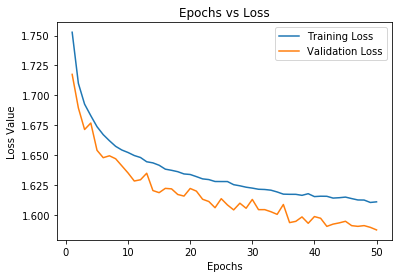

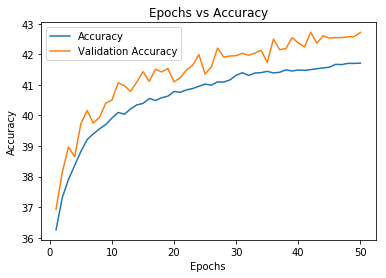

In [0]:
loss_curve(history)
accuracy(history)

In [0]:
print("Evaluating on Test Dataset")
scores = model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Evaluating on Test Dataset
acc: 43.16%


In [0]:
# Predicting for random year/month/day/hour
from math import floor 

test = np.array([[2019, 2, 11, 1, 49.237994, -123.083282, DistanceToGraffiti(49.237994, -123.083282), DistanceToFountain(49.237994, -123.083282)]])
test = scaler.transform(test)
ans = model.predict(test)

for i, n in enumerate(ans[0]):
  print("Probability of " + str(labels[i]) + ": " + str(floor(n*100)) + "%")
  

Probability of Break and Enter Commercial: 3%
Probability of Break and Enter Residential/Other: 18%
Probability of Mischief: 20%
Probability of Other Theft: 0%
Probability of Theft from Vehicle: 43%
Probability of Theft of Bicycle: 3%
Probability of Theft of Vehicle: 7%
Probability of Vehicle Collision or Pedestrian Struck (with Fatality): 0%
Probability of Vehicle Collision or Pedestrian Struck (with Injury): 2%


In [0]:
# Predicting for another random year/month/day/hour

test = np.array([[2012, 6, 4, 22, 49.238019, -123.163815, DistanceToGraffiti(49.238019, -123.163815), DistanceToFountain(49.238019, -123.163815)]])
test = scaler.transform(test)
ans = model.predict(test)

for i, n in enumerate(ans[0]):
  print("Probability of " + str(labels[i]) + ": " + str(floor(n*100)) + "%")

Probability of Break and Enter Commercial: 1%
Probability of Break and Enter Residential/Other: 17%
Probability of Mischief: 15%
Probability of Other Theft: 0%
Probability of Theft from Vehicle: 52%
Probability of Theft of Bicycle: 2%
Probability of Theft of Vehicle: 8%
Probability of Vehicle Collision or Pedestrian Struck (with Fatality): 0%
Probability of Vehicle Collision or Pedestrian Struck (with Injury): 2%


In [0]:
# Predict crime in a location over the whole day
for i in range(0, 25, 5):
  test = np.array([[2012, 6, 4, i, 49.284645, -123.136306, DistanceToGraffiti(49.284645, -123.136306), DistanceToFountain(49.284645, -123.136306)]])
  test = scaler.transform(test)
  ans = model.predict(test)
  print("At " + str(i) + " hour: ")

  for i, n in enumerate(ans[0]):
    print("Probability of " + str(labels[i]) + ": " + str(floor(n*100)) + "%")

At 0 hour: 
Probability of Break and Enter Commercial: 15%
Probability of Break and Enter Residential/Other: 5%
Probability of Mischief: 21%
Probability of Other Theft: 1%
Probability of Theft from Vehicle: 41%
Probability of Theft of Bicycle: 9%
Probability of Theft of Vehicle: 3%
Probability of Vehicle Collision or Pedestrian Struck (with Fatality): 0%
Probability of Vehicle Collision or Pedestrian Struck (with Injury): 2%
At 5 hour: 
Probability of Break and Enter Commercial: 24%
Probability of Break and Enter Residential/Other: 6%
Probability of Mischief: 22%
Probability of Other Theft: 1%
Probability of Theft from Vehicle: 31%
Probability of Theft of Bicycle: 5%
Probability of Theft of Vehicle: 2%
Probability of Vehicle Collision or Pedestrian Struck (with Fatality): 0%
Probability of Vehicle Collision or Pedestrian Struck (with Injury): 5%
At 10 hour: 
Probability of Break and Enter Commercial: 5%
Probability of Break and Enter Residential/Other: 9%
Probability of Mischief: 13%
P